In [6]:
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.model_selection import train_test_split

%matplotlib inline
plt.ion()

Learned slope after 20 iterations is 2.0297471764014583; control value was 2.
Learned y-intercept after 20 iterations is 0.7207833879344243; control value was 1.


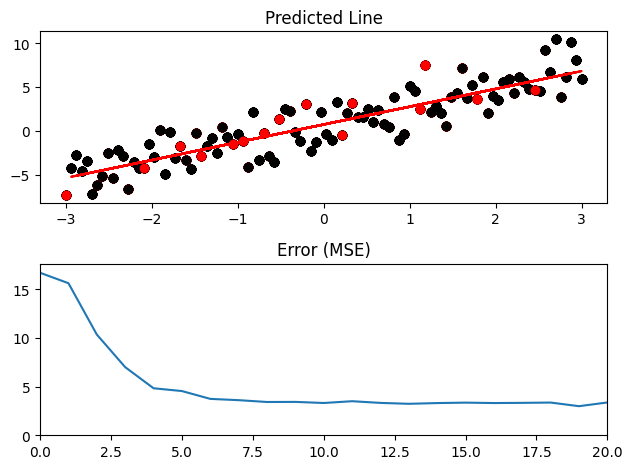

In [16]:
def calculate_gradient(slope, intercept, x_vals, y_vals):

    abs_error = (slope * x_vals + intercept) - y_vals
    d_slope = np.sum(2 * abs_error * x_vals) / len(x_vals)
    d_intercept = np.sum(2 * (abs_error)) / len(x_vals)

    mse = np.sum(np.power(abs_error, 2)) / len(x_vals)

    return (d_slope, d_intercept, mse)

def sgd(m, b, left_xlim=-3, right_xlim=3, train_iterations=50, test_size=0.15):

    fig, [ax, err_ax] = plt.subplots(2, 1)
    ax.set_title('Predicted Line')
    err_ax.set_title('Error (MSE)')

    fig.tight_layout()

    theta = 0
    phi = 0

    convergence_error_threshold = 0.1

    learning_rate = 0.05

    x = np.linspace(left_xlim, right_xlim, 100)[:, np.newaxis]
    y = m * x + b + (2 * np.random.randn(100,1))
    ax.scatter(x, y, color='black')

    dtheta, dphi, err = calculate_gradient(theta, phi, x, y)

    err_vals = [err]

    y_train_predicted = theta * x + phi
    z, = ax.plot(x, y_train_predicted, color='red')
    e, = err_ax.plot(np.arange(0, len(err_vals)), err_vals)

    err_ax.set_ylim(bottom=0)
    err_ax.set_xlim(left=0, right=train_iterations)

    previous_loss = err

    for i in range(train_iterations):

        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size)

        ax.scatter(x_train, y_train, color='black')
        ax.scatter(x_test, y_test, color='red')

        dtheta, dphi, err = calculate_gradient(theta, phi, x_train, y_train)

        theta = theta - (learning_rate * dtheta)
        phi = phi - (learning_rate * dphi)

        y_train_predicted = theta * x_train + phi
        err_vals.append(err)

        z.set_xdata(x_train)
        z.set_ydata(y_train_predicted)
        e.set_xdata(np.arange(0, len(err_vals)))
        e.set_ydata(err_vals)

        fig.canvas.draw()
        fig.canvas.flush_events()

        #time.sleep(0.05)

        terminate_early = False
        if abs(err - previous_loss) < 0.005 * err and terminate_early:
            print('We converged to our specific tolerance in {} iterations.'.format(i))
            break
    
    print('Learned slope after {} iterations is {}; control value was {}.'.format(
        train_iterations,
        theta,
        m,
    ))

    print('Learned y-intercept after {} iterations is {}; control value was {}.'.format(
        train_iterations,
        phi,
        b,
    ))

    return fig, ax

sgd_fig, sgd_ax = sgd(2, 1, train_iterations=20)